In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import h5py

plt.style.use(['science','notebook','grid'])
plt.rcParams['text.usetex'] = False

In [18]:
f = h5py.File('./kappa-m20201.hdf5')

for a in list(list(f)):
    print( a ,'.'*(25-len(a)), f[a].shape)

ave_pp ................... (111, 6)
boundary_mfp ............. ()
frequency ................ (111, 6)
gamma .................... (101, 111, 6)
gamma_isotope ............ (111, 6)
grid_point ............... (111,)
group_velocity ........... (111, 6, 3)
gv_by_gv ................. (111, 6, 6)
heat_capacity ............ (101, 111, 6)
kappa .................... (101, 6)
kappa_unit_conversion .... ()
mesh ..................... (3,)
mode_kappa ............... (101, 111, 6, 6)
qpoint ................... (111, 3)
temperature .............. (101,)
version .................. ()
weight ................... (111,)


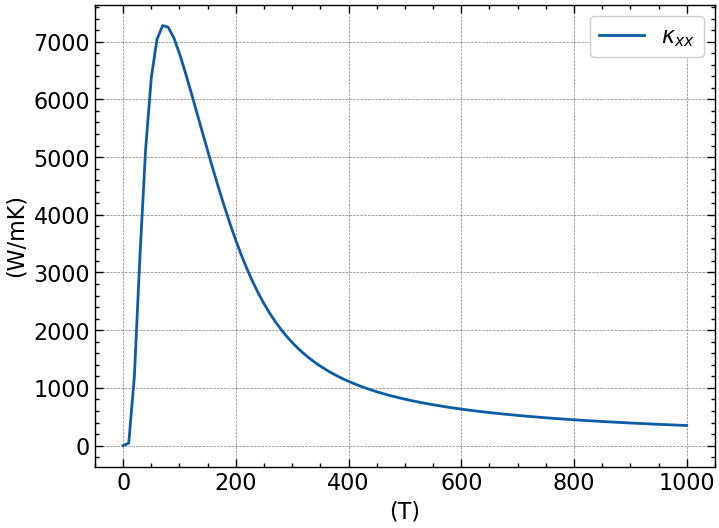

In [19]:


plt.plot(f['temperature'][:], np.array(f['kappa'])[:, 0], label=r'$\kappa_{xx}$')
# plt.plot(f['temperature'][:], f['kappa'][:, 1], label=r'$\kappa_{yy}$')

plt.xlabel('(T)')
plt.ylabel('(W/mK)')
plt.legend()
plt.grid(True)
plt.show()

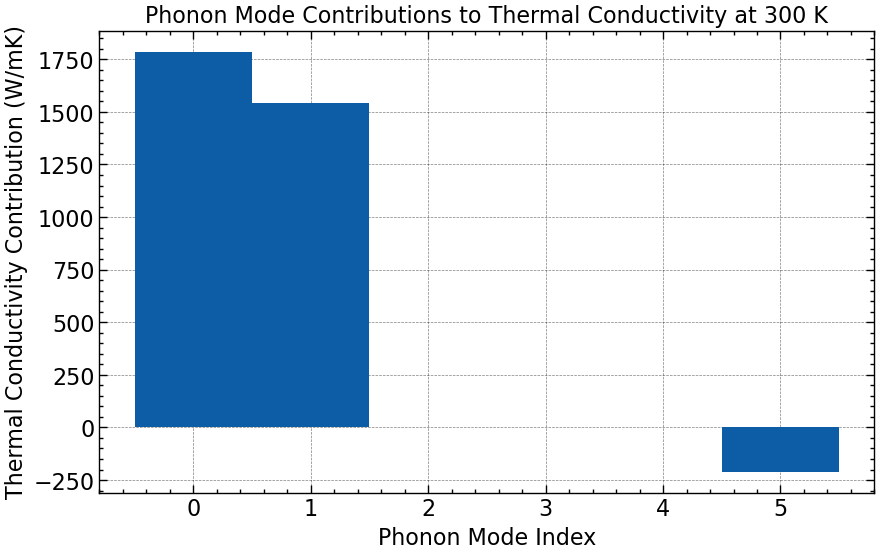

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the HDF5 file (change the filename according to your output)
filename = './kappa-m20201.hdf5'
with h5py.File(filename, 'r') as f:
    temperatures = f['temperature'][:]
    kappa_mode = f['kappa'][:]  # Mode-resolved thermal conductivity
    frequencies = f['frequency'][:]

# Sum up the contributions of each mode across all branches
kappa_total = np.sum(kappa_mode, axis=1)  # Summing over all modes

# For simplicity, let's analyze the contributions at a specific temperature
temp_index = np.argmin(np.abs(temperatures - 300))  # Find the index for 300 K

# Plot the mode-resolved contributions at 300 K
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(kappa_mode[temp_index])), kappa_mode[temp_index], width=1.0)
plt.xlabel('Phonon Mode Index')
plt.ylabel('Thermal Conductivity Contribution (W/mK)')
plt.title('Phonon Mode Contributions to Thermal Conductivity at 300 K')
plt.show()

In [21]:
with h5py.File(filename, 'r') as f: 
    g = f['gamma'][30]
    gv = f['group_velocity']
g = np.where(g > 0, g, -1)
lifetime = np.where(g > 0, 1.0 / (2 * 2 * np.pi * g), 0)

[]

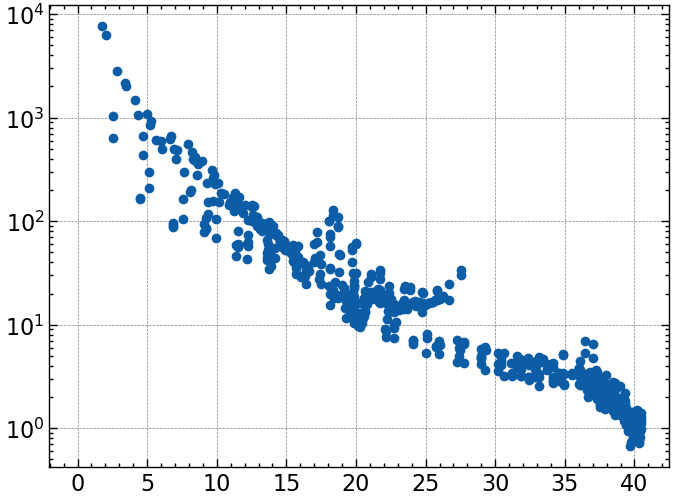

In [22]:
i = 1
plt.scatter(frequencies, lifetime)
plt.semilogy()


In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the HDF5 file (replace with your actual filename)
filename = './kappa-m20201.hdf5'

with h5py.File(filename, 'r') as f:
    temperatures = f['temperature'][:]  # Array of temperatures
    frequencies = f['frequency'][:]     # Phonon frequencies
    gamma = f['gamma'][:]               # Phonon scattering rates

# Check the shape of the arrays to understand how the data is structured
print("Shape of frequencies:", frequencies.shape)
print("Shape of gamma:", gamma.shape)

Shape of frequencies: (111, 6)
Shape of gamma: (101, 111, 6)


ValueError: x and y must be the same size

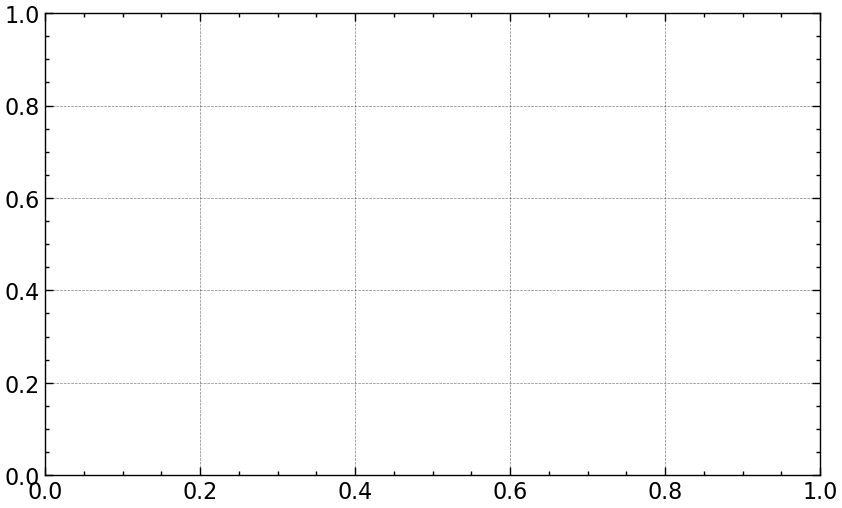

In [24]:
# Choose a specific temperature index, e.g., closest to 300 K
temp_index = np.argmin(np.abs(temperatures - 300))  # Index for 300 K (or any desired temperature)

# Flatten the frequency and gamma arrays for the selected temperature
frequencies_flat = frequencies[temp_index].flatten()
gamma_flat = gamma[temp_index].flatten()

# Plotting the phonon scattering rates vs. frequency
plt.figure(figsize=(10, 6))
plt.scatter(frequencies_flat, gamma_flat, s=10, alpha=0.7)
plt.xlabel('Phonon Frequency (THz)')
plt.ylabel('Phonon Scattering Rate (1/ps)')
plt.title('Phonon Scattering Rates vs Frequency at 300 K')
plt.grid(True)
plt.show()